# ✅ Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

import sys
import os

# Ensure access to preprocessing.py
sys.path.append(os.path.abspath('../'))
from utils.preprocessing import clean_text

C:\Users\tilak\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tilak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tilak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tilak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# ✅ Step 2: Load Data

In [2]:
df = pd.read_csv('../data/tweets.csv', encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = df[['text', 'target']]
df['target'] = df['target'].replace({0: 'negative', 2: 'neutral', 4: 'positive'})
df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative


# ✅ Step 3: Clean Text

In [3]:
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


# ✅ Step 4: Plot Sentiment Distribution

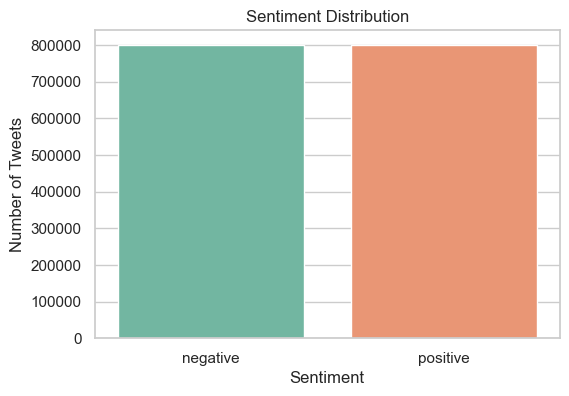

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

# ✅ Step 5: WordClouds by Sentiment

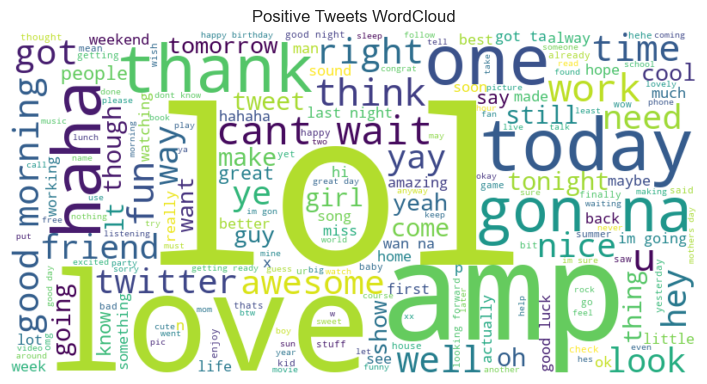

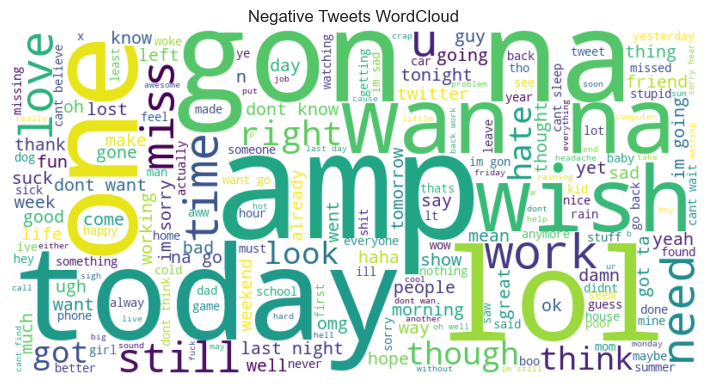

[WARNING] No text found for sentiment: neutral


In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for sentiment in ['positive', 'negative', 'neutral']:
    # Filter and join all tweets of this sentiment
    text = ' '.join(df[df['target'] == sentiment]['clean_text'].dropna().astype(str))

    if len(text.strip()) == 0:
        print(f"[WARNING] No text found for sentiment: {sentiment}")
        continue  # Skip this iteration if no text

    # Generate WordCloud safely
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment.capitalize()} Tweets WordCloud')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ✅ Step 6: Preview Random Cleaned Tweets

In [7]:
df[['target', 'clean_text']].sample(5)

,target,clean_text
1150978,positive,haha aright
157356,negative,ceiling weird thoughhhh look woof woof hes sex...
96800,negative,previous tweet didnt work well crashed early i...
574395,negative,waterbased paint used phone totally wiped
1266600,positive,dude gave k points didnt know micheal phelps f...
